# Race and Gun Death
A look at the relationship between race and gun death rates.

[FiveThirtyEight](http://fivethirtyeight.com/) has released an interesting dataset with information from the CDC on [gun deaths in 2012-2014 in America](https://github.com/fivethirtyeight/guns-data).

In this study, we will look at the relationship between race and gun death.

In order to do that, we will use [data from the 2010 census]() available from DataQuest.

In [104]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

death_data = pd.read_csv('538_gun_data.csv')
census_data = pd.read_csv('census.csv')

death_data = death_data.loc[:,['intent','race']]

murder_data = death_data[death_data['intent']=='Homicide']
suicide_data = death_data[death_data['intent']=='Suicide']

populations = {
    'Asian/Pacific Islander':census_data.at[0,'Race Alone - Asian']+census_data.at[0,'Race Alone - Native Hawaiian and Other Pacific Islander'],
    'White':census_data.at[0,'Race Alone - White'],
    'Native American/Native Alaskan':census_data.at[0,'Race Alone - American Indian and Alaska Native'],
    'Black':census_data.at[0,'Race Alone - Black or African American'],
    'Hispanic':census_data.at[0,'Race Alone - Hispanic'],
}

population_by_race = pd.DataFrame(list(populations.items()), columns=['race', 'population'])

In [137]:
def plot_data(data_in, ptitle):
    counts = pd.DataFrame(data_in.race.value_counts().reset_index())
    counts.columns = ['race', 'deaths']
    
    merged = pd.merge(population_by_race, counts, on='race')
    merged['per_100k'] = merged['deaths'] / merged['population'] * 100000
    
    pivoted = pd.pivot_table(merged, index=['race'], values=['per_100k'])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    a = 0.7
    customcmap = [(x/24.0,  x/48.0, 0.05) for x in range(len(pivoted))]
    
    pivoted['per_100k'].plot(kind='barh', ax=ax, alpha=a, legend=False, color=customcmap,
                      edgecolor='w', xlim=(0,max(pivoted['per_100k'])), title=ptitle)

    ax.grid(False)
    ax.set_frame_on(False)
    
    ax.yaxis.label.set_visible(False)
    
    ax.set_title(ax.get_title(), fontsize=26, alpha=a, ha='left')
    plt.subplots_adjust(top=0.9)
    ax.title.set_position((0,1.08))
    
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    # Customize x tick lables
    xticks = [5,10,20,50]
    ax.xaxis.set_ticks(xticks)
    ax.set_xticklabels(xticks, fontsize=16, alpha=a)
    
    # Customize y tick labels
    yticks = [item.get_text() for item in ax.get_yticklabels()]
    ax.set_yticklabels(yticks, fontsize=16, alpha=a)
    ax.yaxis.set_tick_params(pad=12)  
    
    return fig

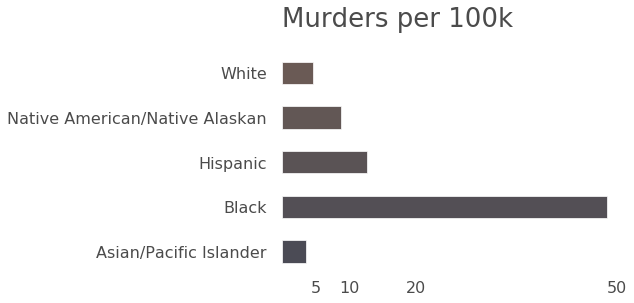

In [138]:
mplt = plot_data(murder_data, 'Murders per 100k')
mplt.savefig('murder_by_race_per_100k.png', bbox_inches='tight', dpi=300)

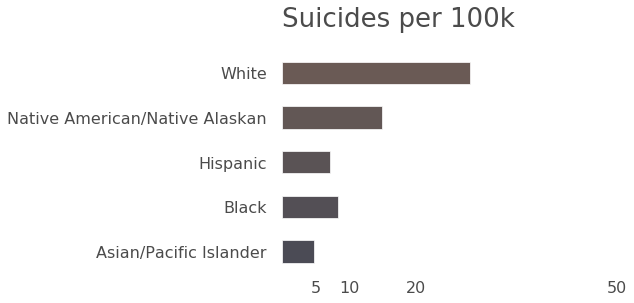

In [139]:
splt = plot_data(suicide_data, 'Suicides per 100k')
splt.savefig('suicide_by_race_per_100k.png', bbox_inches='tight', dpi=300)